In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

# Load the model
model = tf.keras.models.load_model('VGG16_rice_disease_classifier.keras')

# Display model architecture
model.summary()

2024-12-26 09:04:38.932291: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-26 09:04:38.940156: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-26 09:04:38.960777: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735175078.997097   83895 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735175079.007251   83895 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-26 09:04:39.044382: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 14)             │         7,182 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,272,940 (203.22 MB)

 Trainable params: 12,852,750 (49.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 25,705,502 (98.06 MB)

In [7]:
# List of image file paths
image_paths = [
    'working/Tungro_virus (18).jpg',
    'working/Sheath_blight (53).jpg',
    'working/False_smut (38).jpg'
]

# Class labels
class_labels = [
    'bacterial_leaf_blight', 'bacterial_leaf_streak', 'bakanae',
    'brown_spot', 'grassy_stunt_virus', 'healthy_rice_plant',
    'narrow_brown_spot', 'ragged_stunt_virus', 'rice_blast',
    'rice_false_smut', 'sheath_blight', 'sheath_rot',
    'stem_rot', 'tungro_virus'
]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Image: working/Tungro_virus (18).jpg
Predicted class: tungro_virus
--------------------------------------------------


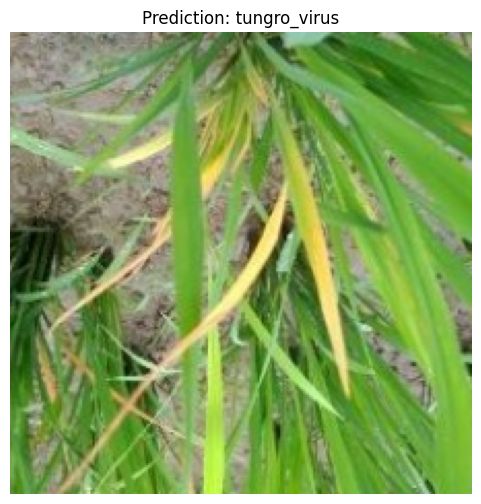

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
Image: working/Sheath_blight (53).jpg
Predicted class: sheath_blight
--------------------------------------------------


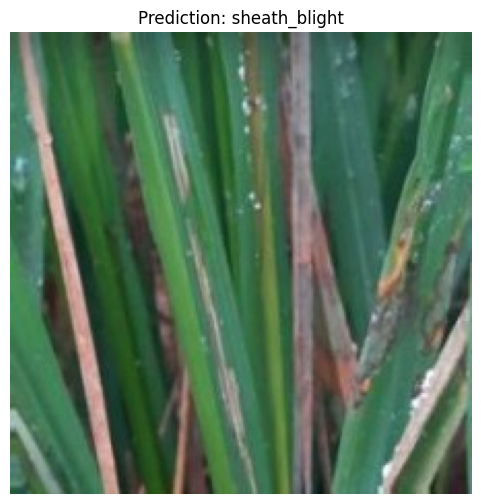

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Image: working/False_smut (38).jpg
Predicted class: rice_false_smut
--------------------------------------------------


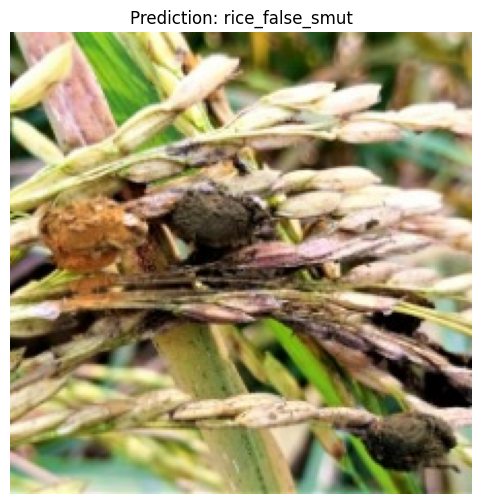

In [15]:
# Process and predict for each image
for img_path in image_paths:
    # Load and preprocess the image
    img = load_img(img_path, target_size=(224, 224))  # Resize to match model input
    img_array = img_to_array(img) / 255.0  # Normalize
    img_array = tf.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make predictions
    predictions = model.predict(img_array)
    confidence_scores = tf.nn.softmax(predictions[0]).numpy()  # Convert to probabilities
    predicted_class = np.argmax(confidence_scores)  # Get the index of the highest score

    # Output results
    print(f"Image: {img_path}")
    print(f"Predicted class: {class_labels[predicted_class]}")
    print("-" * 50)

    # Visualization
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(f"Prediction: {class_labels[predicted_class]}")
    plt.axis('off')
    plt.show()